# FastAI Example

> FASTAI Example

In [ ]:
#| default_exp fastai

## Check for all installs and versions

In [ ]:
#|eval: false
!conda list | grep "pytorch"

ffmpeg                    4.3                  hf484d3e_0    pytorch
libjpeg-turbo             2.0.0                h9bf148f_0    pytorch
pytorch                   2.0.1           py3.11_cuda11.8_cudnn8.7.0_0    pytorch
pytorch-cuda              11.8                 h7e8668a_5    pytorch
pytorch-ignite            0.4.12                   pypi_0    pypi
pytorch-lightning         2.0.7                    pypi_0    pypi
pytorch-mutex             1.0                        cuda    pytorch
torchaudio                2.0.2               py311_cu118    pytorch
torchtriton               2.0.0                     py311    pytorch
torchvision               0.15.2              py311_cu118    pytorch


In [ ]:
#|eval: false
!nvcc --version

/bin/bash: line 1: nvcc: command not found


In [ ]:
#|eval: false
!pip list | grep "fastai" 

fastai                        2.7.12


In [ ]:
#|eval: false
!pip list | grep "fastbook"

fastbook                      0.0.28


In [ ]:
#|eval: false
import torch

In [ ]:
#|eval: false
torch.cuda.is_available()

True

## Generate Data Images

In [ ]:
#|eval: false
from fastbook import search_images_ddg
from fastdownload import download_url
from fastai.vision.all import *

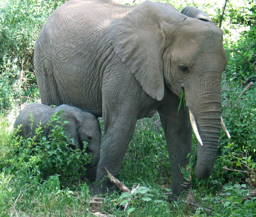

In [ ]:
#|eval: false
download_url(search_images_ddg('elephant', max_images=2)[1], 'Data/elephant.jpg', show_progress=False)

im = Image.open('Data/elephant.jpg')
im.to_thumb(256,256)

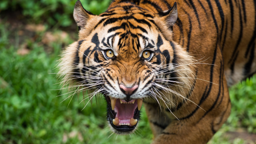

In [ ]:
#|eval: false
download_url(search_images_ddg('tiger', max_images=1)[0], 'Data/tiger.jpg', show_progress=False)
Image.open('Data/tiger.jpg').to_thumb(256,256)

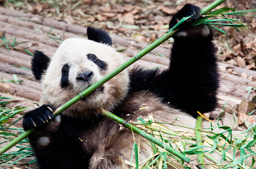

In [ ]:
#|eval: false
download_url(search_images_ddg('panda', max_images=2)[1], 'Data/panda.jpg', show_progress=False)
Image.open('Data/panda.jpg').to_thumb(256,256)

In [ ]:
#|eval: false
import os
from nbdevAuto import functions

In [ ]:
from fastbook import search_images_ddg

In [ ]:
#|eval: false
path = Path('Data/animal_pics') #Replace with folder path

animals = ('chimpanzee', 'elephant', 'giraffe',
                    'kangaroo','lion','panda','rabbit',
                    'rhino', 'tiger', 'wolf')   

functions.create_data_folder(
    path,
    animals,
)

created chimpanzee folder
created elephant folder
created giraffe folder
created kangaroo folder
created lion folder
created panda folder
created rabbit folder
created rhino folder
created tiger folder
created wolf folder
Error with 200 images of chimpanzee: name 'search_images_ddg' is not defined
Error with 180 images of chimpanzee: name 'search_images_ddg' is not defined
Error with 160 images of chimpanzee: name 'search_images_ddg' is not defined
Error with 140 images of chimpanzee: name 'search_images_ddg' is not defined
Error with 120 images of chimpanzee: name 'search_images_ddg' is not defined
Error with 100 images of chimpanzee: name 'search_images_ddg' is not defined
Error with 80 images of chimpanzee: name 'search_images_ddg' is not defined
Error with 60 images of chimpanzee: name 'search_images_ddg' is not defined
Error with 40 images of chimpanzee: name 'search_images_ddg' is not defined
Error with 20 images of chimpanzee: name 'search_images_ddg' is not defined
Error with 2

NameError: name 'verify_images' is not defined

## Step 2: Train our model

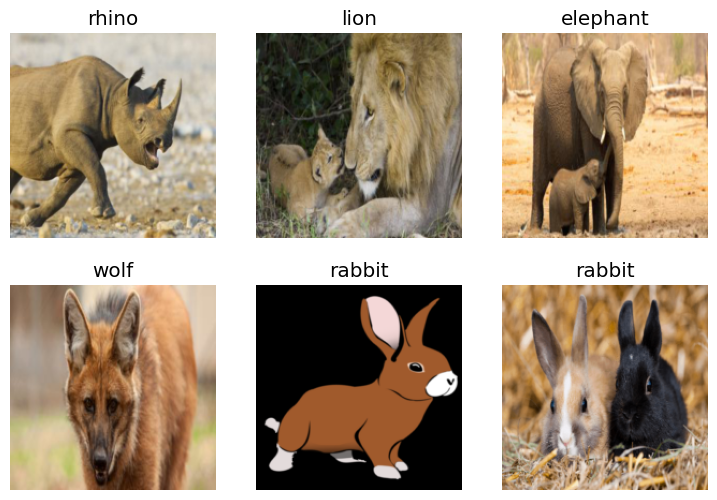

In [ ]:
#|eval: false
from fastai.metrics import accuracy, error_rate

dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)

dls.show_batch(max_n=6)

In [ ]:
#|eval: false
# Define your metrics
metrics = [accuracy, error_rate]

In [ ]:
#|eval: false
learn11 = vision_learner(dls, resnet18, metrics=metrics)
learn11.fine_tune(5)

/home/thekkel/mambaforge/envs/cfast/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/thekkel/mambaforge/envs/cfast/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.844674,0.418879,0.868132,0.131868,00:07


/home/thekkel/mambaforge/envs/cfast/lib/python3.11/site-packages/torch/nn/modules/conv.py:459: UserWarning: Applied workaround for CuDNN issue, install nvrtc.so (Triggered internally at /opt/conda/conda-bld/pytorch_1682343995622/work/aten/src/ATen/native/cudnn/Conv_v8.cpp:80.)
  return F.conv2d(input, weight, bias, self.stride,


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.435839,0.335678,0.892857,0.107143,00:07
1,0.259686,0.304955,0.906593,0.093407,00:07
2,0.163921,0.302036,0.898352,0.101648,00:07
3,0.104006,0.282673,0.912088,0.087912,00:07
4,0.070245,0.277444,0.914835,0.085165,00:07


## Step 3: Display Results: Confusion Matrix

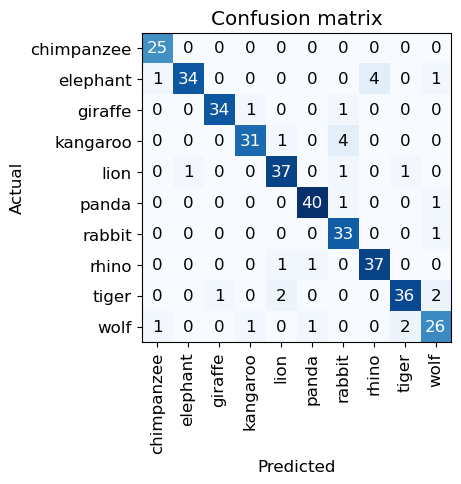

In [ ]:
#|eval: false
interp11 = ClassificationInterpretation.from_learner(learn11)
interp11.plot_confusion_matrix()

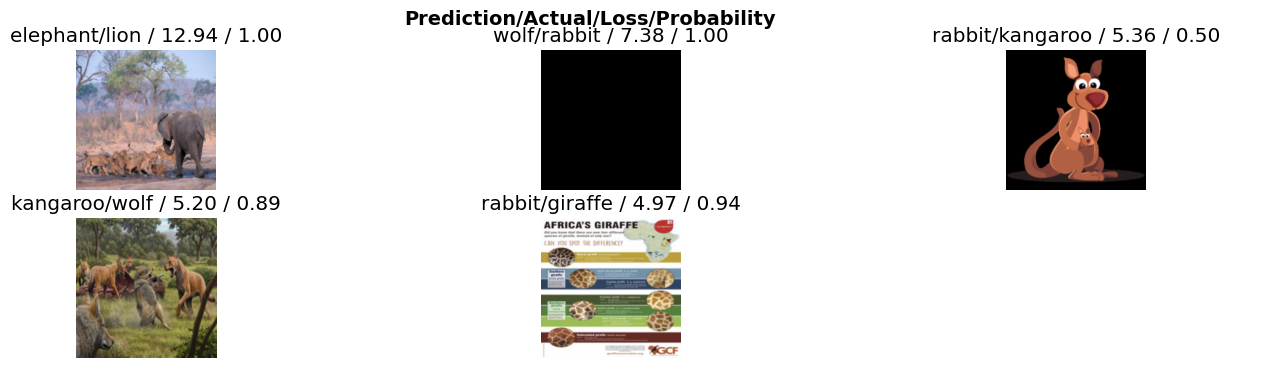

In [ ]:
#|eval: false
interp11.plot_top_losses(5,nrows = 2, figsize=(17,4))

## Step 4: Display Results: t-SNE

In [ ]:
#|eval: false
from fastai.vision.all import *
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

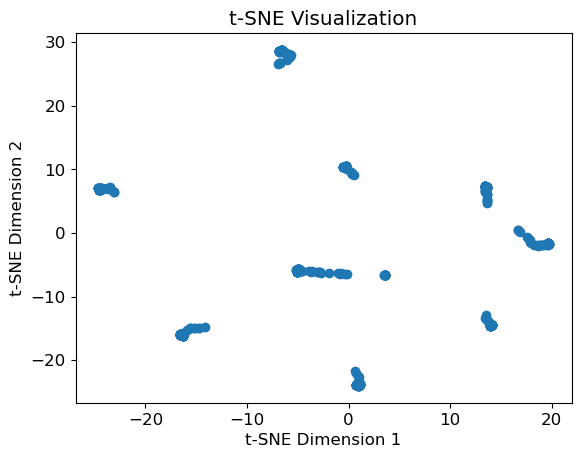

In [ ]:
#|eval: false
features, labels = learn11.get_preds(dl=dls.valid)

# Replace 'val_features' with your extracted features
tsne = TSNE(n_components=2)
reduced_features = tsne.fit_transform(features)

# Replace 'labels' with your image labels if available
plt.scatter(reduced_features[:, 0], reduced_features[:, 1])
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Visualization')
plt.show()

## Step 5: Use our model

This is a: elephant with probability: 0.9999996423721313.


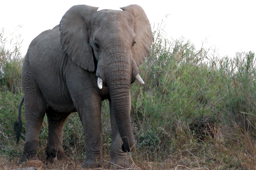

In [ ]:
#|eval: false
animal_list =  ('chimpanzee','elephant','giraffe',
                'kangaroo', 'lion','panda', 'rabbit',
                'rhino','tiger','wolf')
image= 'elephant.jpg'


is_real,_,probs = learn11.predict(PILImage.create(image))
max_value, max_index = torch.max(probs, dim=0)
print(f"This is a: {animal_list[max_index]} with probability: {max_value}.")

Image.open(image).to_thumb(256,256)

In [ ]:
#|eval: false
animal_list =  ('chimpanzee','elephant','giraffe',
                'kangaroo', 'lion','panda', 'rabbit',
                'rhino','tiger','wolf')
for index, value in enumerate(animal_list):
    np.set_printoptions(suppress=True, precision=4)
    print(f"Probability of {value} is :{probs[index]:4f}.")

Probability of chimpanzee is :0.000000.
Probability of elephant is :1.000000.
Probability of giraffe is :0.000000.
Probability of kangaroo is :0.000000.
Probability of lion is :0.000000.
Probability of panda is :0.000000.
Probability of rabbit is :0.000000.
Probability of rhino is :0.000000.
Probability of tiger is :0.000000.
Probability of wolf is :0.000000.
